# Q Learning
Welcome to your first introduction into _reinforcement learning_! Don't worry
if this term is unfamiliar to you, we will soon define exactly what we mean with it.

But before we get into that, let us introduce the first problem we'll be trying to solve.

## Problem Statement
In this problem, you are tasked with writing an artificial intelligence that controls
a taxi cab inside a 5 by 5 grid like the following:

    +---------+
    |R: | : :G|
    | : | : : |
    | : : : : |
    | | : | : |
    |Y| : |B: |
    +---------+
 
Here a colon (:) represents an un-obstructed pathway and the lines represent walls. 
The 4 letters you see represents the location at which you might have to pick up
a passenger, or drop them off.

As you might imagine, this leads you to have access to 6 possible actions at every
time step: Move up, move down, move left, move right, pick up a passenger, and drop a passenger off.

Of course, being a cabby, time is money! So we keep a score to represent how well we do.
At every timestep we will get a penalty of 1 point (or a reward of -1 point). If we successfully drop
the passenger off at the appropriate location, we get a reward of 20 points, and if we attempt to pick
a passenger up where there is none, or drop them off at the wrong location, we get a penalty of 10 points
(or a reward of -10 points).

The goal is simple: Maximize the number of points!

This system of learning from rewards and penalties is called **reinforcement learning**. Intuitively, 
you can look at this as giving the computer a lollipop if it does well (reward) and hitting it with
a stick if it does badly (negative reward). That's all that reinforcement learning is: Learning in the
way humans do, by means of rewarding good behaviour and punishing bad behaviour.

One of the ways to do this is by a process called _Q-Learning_, which builds an idea of how useful an
action is in any specific state.

## Q Learning?
So what is Q Learning? Well, simply put, Q learning is just the process by which we learn the Q values
of different actions we can take in different states. _"Great."_ I hear you say. _"That doesn't help
me at all!"_ And you're right! Before we delve into the process Q learning, we require a solid understanding
of what a Q value is.

### Q values
Suppose we were to have a mathematical function $f$, that would take in any current game state $s$, as well as a potential action $a$, and would return how high the _total_ reward at _the end_ of the game would be if we were to take this action and play optimally until the end?

Well, that's exactly what the so-called Q function does! Formally, we would write it in the _bellman equation_ variant, like this:
$$Q(s, a) = \mathbb{E}\left[r + \gamma\max_{a'} Q(s', a') | s, a\right]$$
Now some of you may have seen this before and can skip this next paragraph, but for those of you who haven't; let's discuss what exactly this function means.

First let us clarify what each of these symbols mean. $Q(...)$ Is the Q function, $s$ and $a$ are the current state and action (as discussed before), $r$ is the reward we got for performing action $a$ in state $s$, $s'$ is the state we end up in after taking action $a$ in state $s$, and $a'$ is a potential action we can take in state $s'$. The symbols that require a little more explanation here are:

1. $\mathbb{E}$, which stands for the _expected value_<sup>[1](https://en.wikipedia.org/wiki/Expected_value)</sup> as some of you may know it from probability theory; in this case it is needed because the actual reward may differ from what we expect to gain. In practical terms you can think of this as representative of an uncertainty in the calculation. The "|" symbol is related to this in that it says "The expected value of ... _given_ ...".
2. $\gamma$, which stands for the _discount rate_, which discounts future rewards in favour of rewards we can get right now. Example: Would you rather have \$100 now, or \$100 in a year? How about \$110 in a year? The reason you don't choose the \$110 in a year, even though it's worth more, is because you're internally discounting future rewards in favour for rewards right now. The discount factor quantizes this behaviour.

The entire bellman equation can then be summarized as: The Q value for action $a$ in state $s$ is equivalent to the reward we gain for performing this action, and all the _discounted_ future rewards we expect to gain if we play well.

If our Q function were to be perfect, we would have found the optimal strategy, because in any state $s$ we could just choose the action which maximizes $Q(s, a)$. This means that we can consider a Q function to be the brains of our **agent** (intelligent actor).

### Q tables
Let's now consider how this applies to the problem at hand. In the taxi problem, we have 500 potential states (25 positions the taxi could be in, 5 possible positions for the passenger (if we count the passenger being in the taxi as one position), and 4 possible destinations.) In each of these potential states, we have 6 possible actions. We could then consider expressing the Q function in the form of a table like so:

    +-------+----+------+------+-------+---------+----------+
    | State | Up | Down | Left | Right | Pick up | Drop Off |
    +-------+----+------+------+-------+---------+----------+
    |State1 |... | ...  | ...  |  ...  |   ...   |   ...    |
    +-------+----+------+------+-------+---------+----------+
    |  ...  |... | ...  | ...  |  ...  |   ...   |   ...    |
    +-------+----+------+------+-------+---------+----------+

This would fully define the Q function (every state-action pair has an assigned Q value) and take up $500\times 6 = 3000$ memory locations. At that point, the only problem left to solve is how we actually fill this with the appropriate Q values. well, if you recall, that's what Q learning is.

## Q Learning!
Suppose we were to put our agent inside the environment of interest, with a completely randomized Q table. Let's also suppose that we implement the decision-making process in the way we discussed previously: Take the action which holds the highest Q value in this state. Then we would be taking random actions in each state. But in each state, we know exactly the reward we can expect from taking that action, so we could also consider updating the table according to the bellman equation described earlier.

As an example, suppose we were in state 5 and the 2 rows of interest in our Q table look like this:

    +-------+----+------+------+-------+---------+----------+
    | State | Up | Down | Left | Right | Pick up | Drop Off |
    +-------+----+------+------+-------+---------+----------+
    |State5 | 0  |  1   |  2   |   3   |    2    |    1     |
    +-------+----+------+------+-------+---------+----------+
    |State9 | 2  |  3   |  4   |   1   |    0    |    2     |
    +-------+----+------+------+-------+---------+----------+

Then we can see that the right action seems to be the most profitable action to take in state 5, so we take it. After taking it, we observe that we got a reward of 2, and have now ended up in state 9, where the maximum Q value is 4. We may then update the previous Q value according to the bellman equation:
$$Q(state5, right) = 2 + \gamma * \max_{action} Q(state9, action) = 2 + 4\gamma.$$
If we assume $\gamma$ to be $0.9$, we can then update $Q(state5, right)$ to be $2 + 0.9 * 4 = 5.6$. Doing so will leave us with the Q table:

    +-------+----+------+------+-------+---------+----------+
    | State | Up | Down | Left | Right | Pick up | Drop Off |
    +-------+----+------+------+-------+---------+----------+
    |State5 | 0  |  1   |  2   |  5.6  |    2    |    1     |
    +-------+----+------+------+-------+---------+----------+
    |State9 | 2  |  3   |  4   |   1   |    0    |    2     |
    +-------+----+------+------+-------+---------+----------+

In their 1992 paper "Q-learning"<sup>[2](https://link.springer.com/content/pdf/10.1007/BF00992698.pdf)</sup>, Watkins and Dayan proved that this process of iteratively changing Q values in the table will converge to an optimal strategy. This is quite a mouth full, but simply put: Changing Q values like this, works; always!

# The Code
So now that we've got a good idea of how exactly Q learning works, I would encourage you to head over to your favourite IDE, and attempt to code some or all of these concepts out for yourself. After you've gotten stuck (or finished your code), return here to see how we approach this problem.

## Setting up the environment
The problem we're discussing here is available in the OpenAI Gym<sup>[3](https://gym.openai.com/)</sup>, under alias "Taxi-v3". This means that we'll have to install openAI gym, which we can do via `pip install gym`. We're also going to be needing `numpy` and `matplotlib`, which can be installed in a similar way.

Starting with the imports as usual...

In [1]:
%matplotlib inline
import gym
import numpy as np
import matplotlib.pyplot as plt

It then becomes as easy as one line of code to set up the environment:

In [2]:
env = gym.make('Taxi-v3')

Setting up the Q table itself is not much harder, except that we need to figure out how many actions and states our environment has. Luckily, the openAI environments have wonderful shorthand for this, and the fact that this is a discrete environment works in our favour here.

In [3]:
num_states = env.observation_space.n
num_actions = env.action_space.n
Qtable = np.random.random((num_states, num_actions))

## Running the game
Of course, in order to learn by playing, we will have to be able to actually run the game a few times. Here it will be important to keep track of our score (for logging), select appropriate actions, and update the Q table appropriately. Lucky for this, we can implement all of this in just a few lines of code. We will write a function for this now.

We will also write a very similar function, which we can use to watch our agent play. This has no bearing on the actual learning and can be ignored.

In [4]:
def run_game(env, Qtable, gamma=0.9):
    score = 0   # Initialize our score to 0 
    state = env.reset() # Reset the environment to start a new round (or episode)
    done = False
    while not done:
        # Select the action available in this state which has the highest Q value.
        action = Qtable[state].argmax()

        # Actually perform this action, keeping track of the state we end up in,
        # the reward we received, and whether this action caused the game to end.
        next_state, reward, done, _ = env.step(action)

        # Update the Q table based on this observation
        Qtable[state, action] = reward + gamma * Qtable[next_state].max()

        # Add reward to score and move to the next state
        score += reward
        state = next_state
    
    # Return the score when the episode is done.
    return score

def watch_game(env, Qtable):
    steps = 0
    state = env.reset()
    env.render('human')
    done = False
    while not done and steps < 50:
        action = Qtable[state].argmax()
        state, _, done, _ = env.step(action)
        env.render('human')
        steps += 1


## Testing our agent
So since our current Qtabel is completely random, let's see how the agent plays when we start playing this game.

In [5]:
watch_game(env, Qtable)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| |

What you will likely see is that the agent gets stuck repeating 2 moves over and over again. In fact, you may already be thinking about ways in which we may solve this issue (e.g. maybe we should add some randomness?), and we will talk about explorative behaviour in the future. But it turns out that this particular environment is simple enough that we don't need to use such tactics.

## Putting it all together
Now that we have our Q table set up, and a way to run games, we can start putting it all together and write some code that will run for many episodes, keep track of the scores and plot them after we're done. Let's try to run 500 episodes for now, and see where that leads.

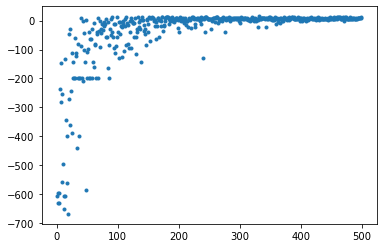

In [6]:
NUM_EPISODES = 500
scores = []
for episode in range(NUM_EPISODES):
    score = run_game(env, Qtable)
    scores.append(score)

plt.plot(scores, '.')
plt.show()

Turns out that 500 episodes is more than enough, and our score has increased dramatically! Lets see how our agent performs now!

In [7]:
watch_game(env, Qtable)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+

That looks like our agent has completely mastered this game!

# Final remarks
Of course, the taxi problem here is just a toy problem, and Q learning has some serious limitations. We will adress these concerns in the next tutorial, which you'll be able to find in `Q Learning/DQN`. Until then, try seeing if you can write your own Q learning algorithm to solve the frozen lake problem<sup>[4](https://gym.openai.com/envs/FrozenLake-v0/)</sup>. In the python file associated with this tutorial, you'll be able to find a reference implementation of this tutorial.

It is also adviced to spend some time thinking about the ways in which Q learning might be limited.

Hint: Our next problem is going to be the cartpole problem<sup>[5](https://gym.openai.com/envs/CartPole-v1/)</sup>.


1. https://en.wikipedia.org/wiki/Expected_value
2. https://link.springer.com/content/pdf/10.1007/BF00992698.pdf
3. https://gym.openai.com/
4. https://gym.openai.com/envs/FrozenLake-v0/
5. https://gym.openai.com/envs/CartPole-v1/